In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

In [2]:
Ns = 1000
noise = np.random.randn(Ns,1)


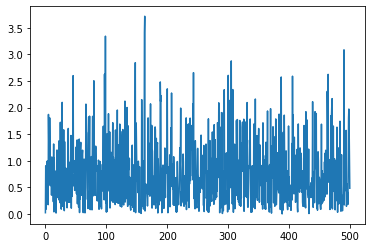

In [3]:
yf = rfft(noise)
xf = rfftfreq(Ns*2 - 1,1/Ns)
plt.plot(xf,np.abs(yf))
plt.show() 

In [4]:
noise.shape

(1000, 1)

In [5]:
noise[100] = 8
noise[200] = 9
noise[300] = 4
noise[500] = 9
noise[700] = 11


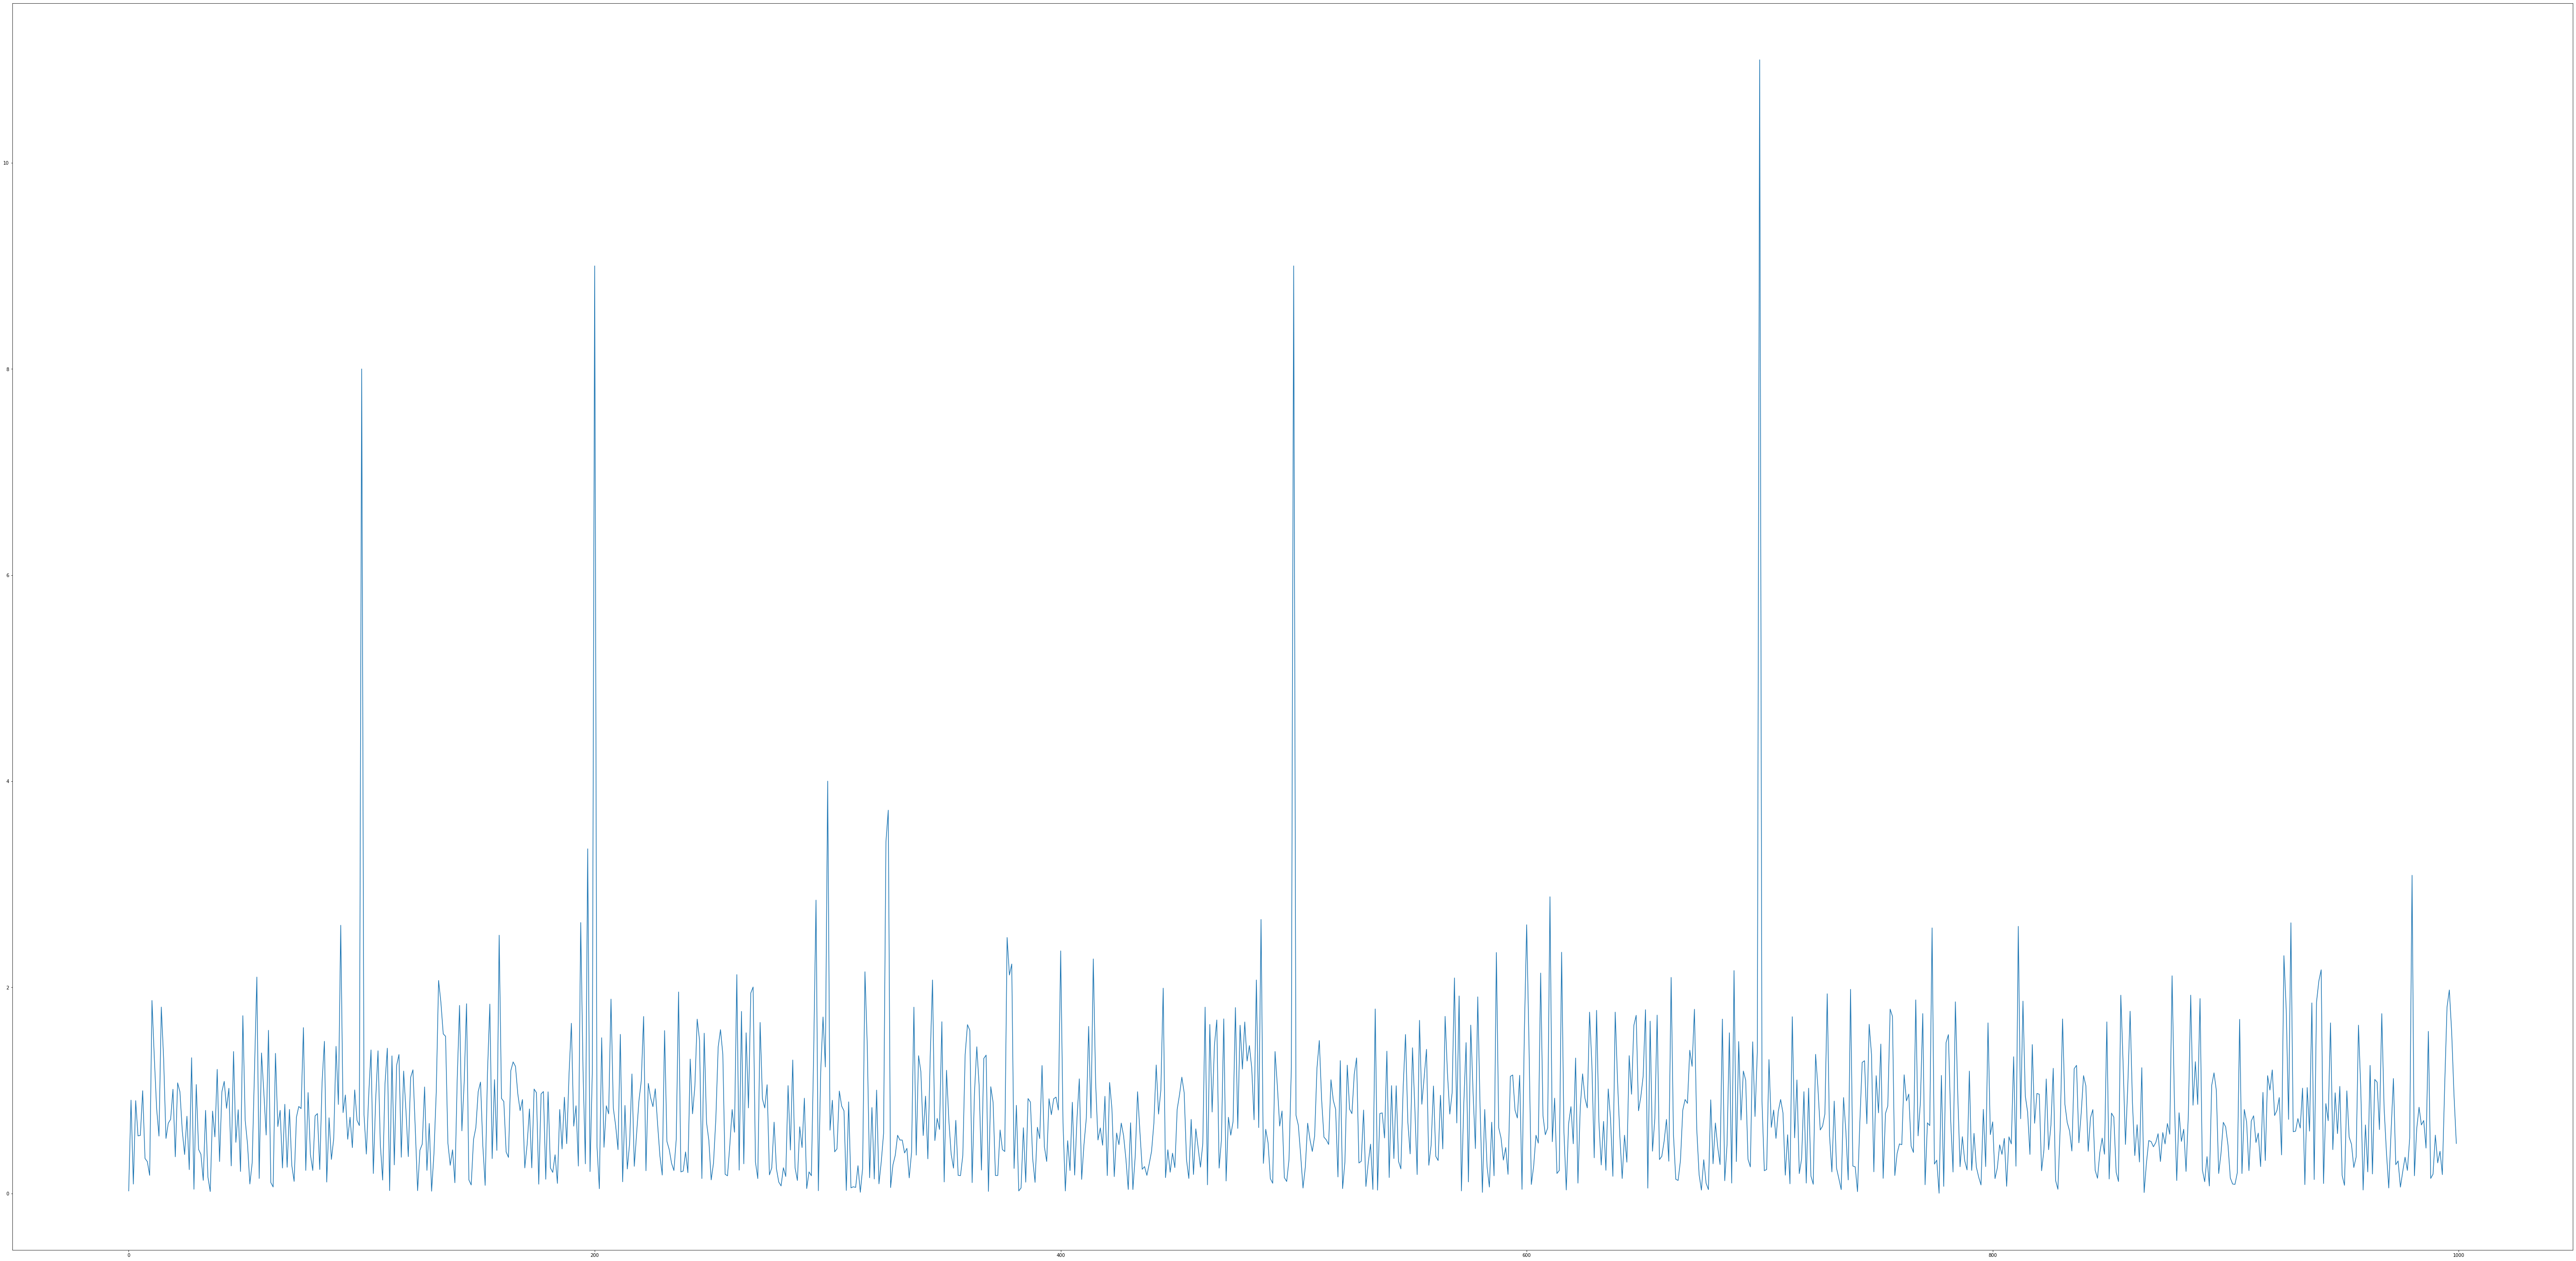

In [6]:
plt.figure(figsize=(100,50))
plt.plot(np.abs(noise))

In [7]:
TRAINING_CELL_SIZE = T = 12
GUARD_CELL_SIZE = G = 2
OFFSET = OFF= 3

In [8]:
threshold_cfar = []
signal_cfar = []

In [9]:
#using abs noise
for i in range(0,Ns -(GUARD_CELL_SIZE + TRAINING_CELL_SIZE)):
  n = np.sum(np.abs(noise[i:i+T-1]))
  t = (n/T)*OFF
  threshold_cfar.append(t)
  signal = np.abs(noise[i+T+G])
  if signal < t:
    signal = 0
  signal_cfar.append(signal)


/home/arkaprabha/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


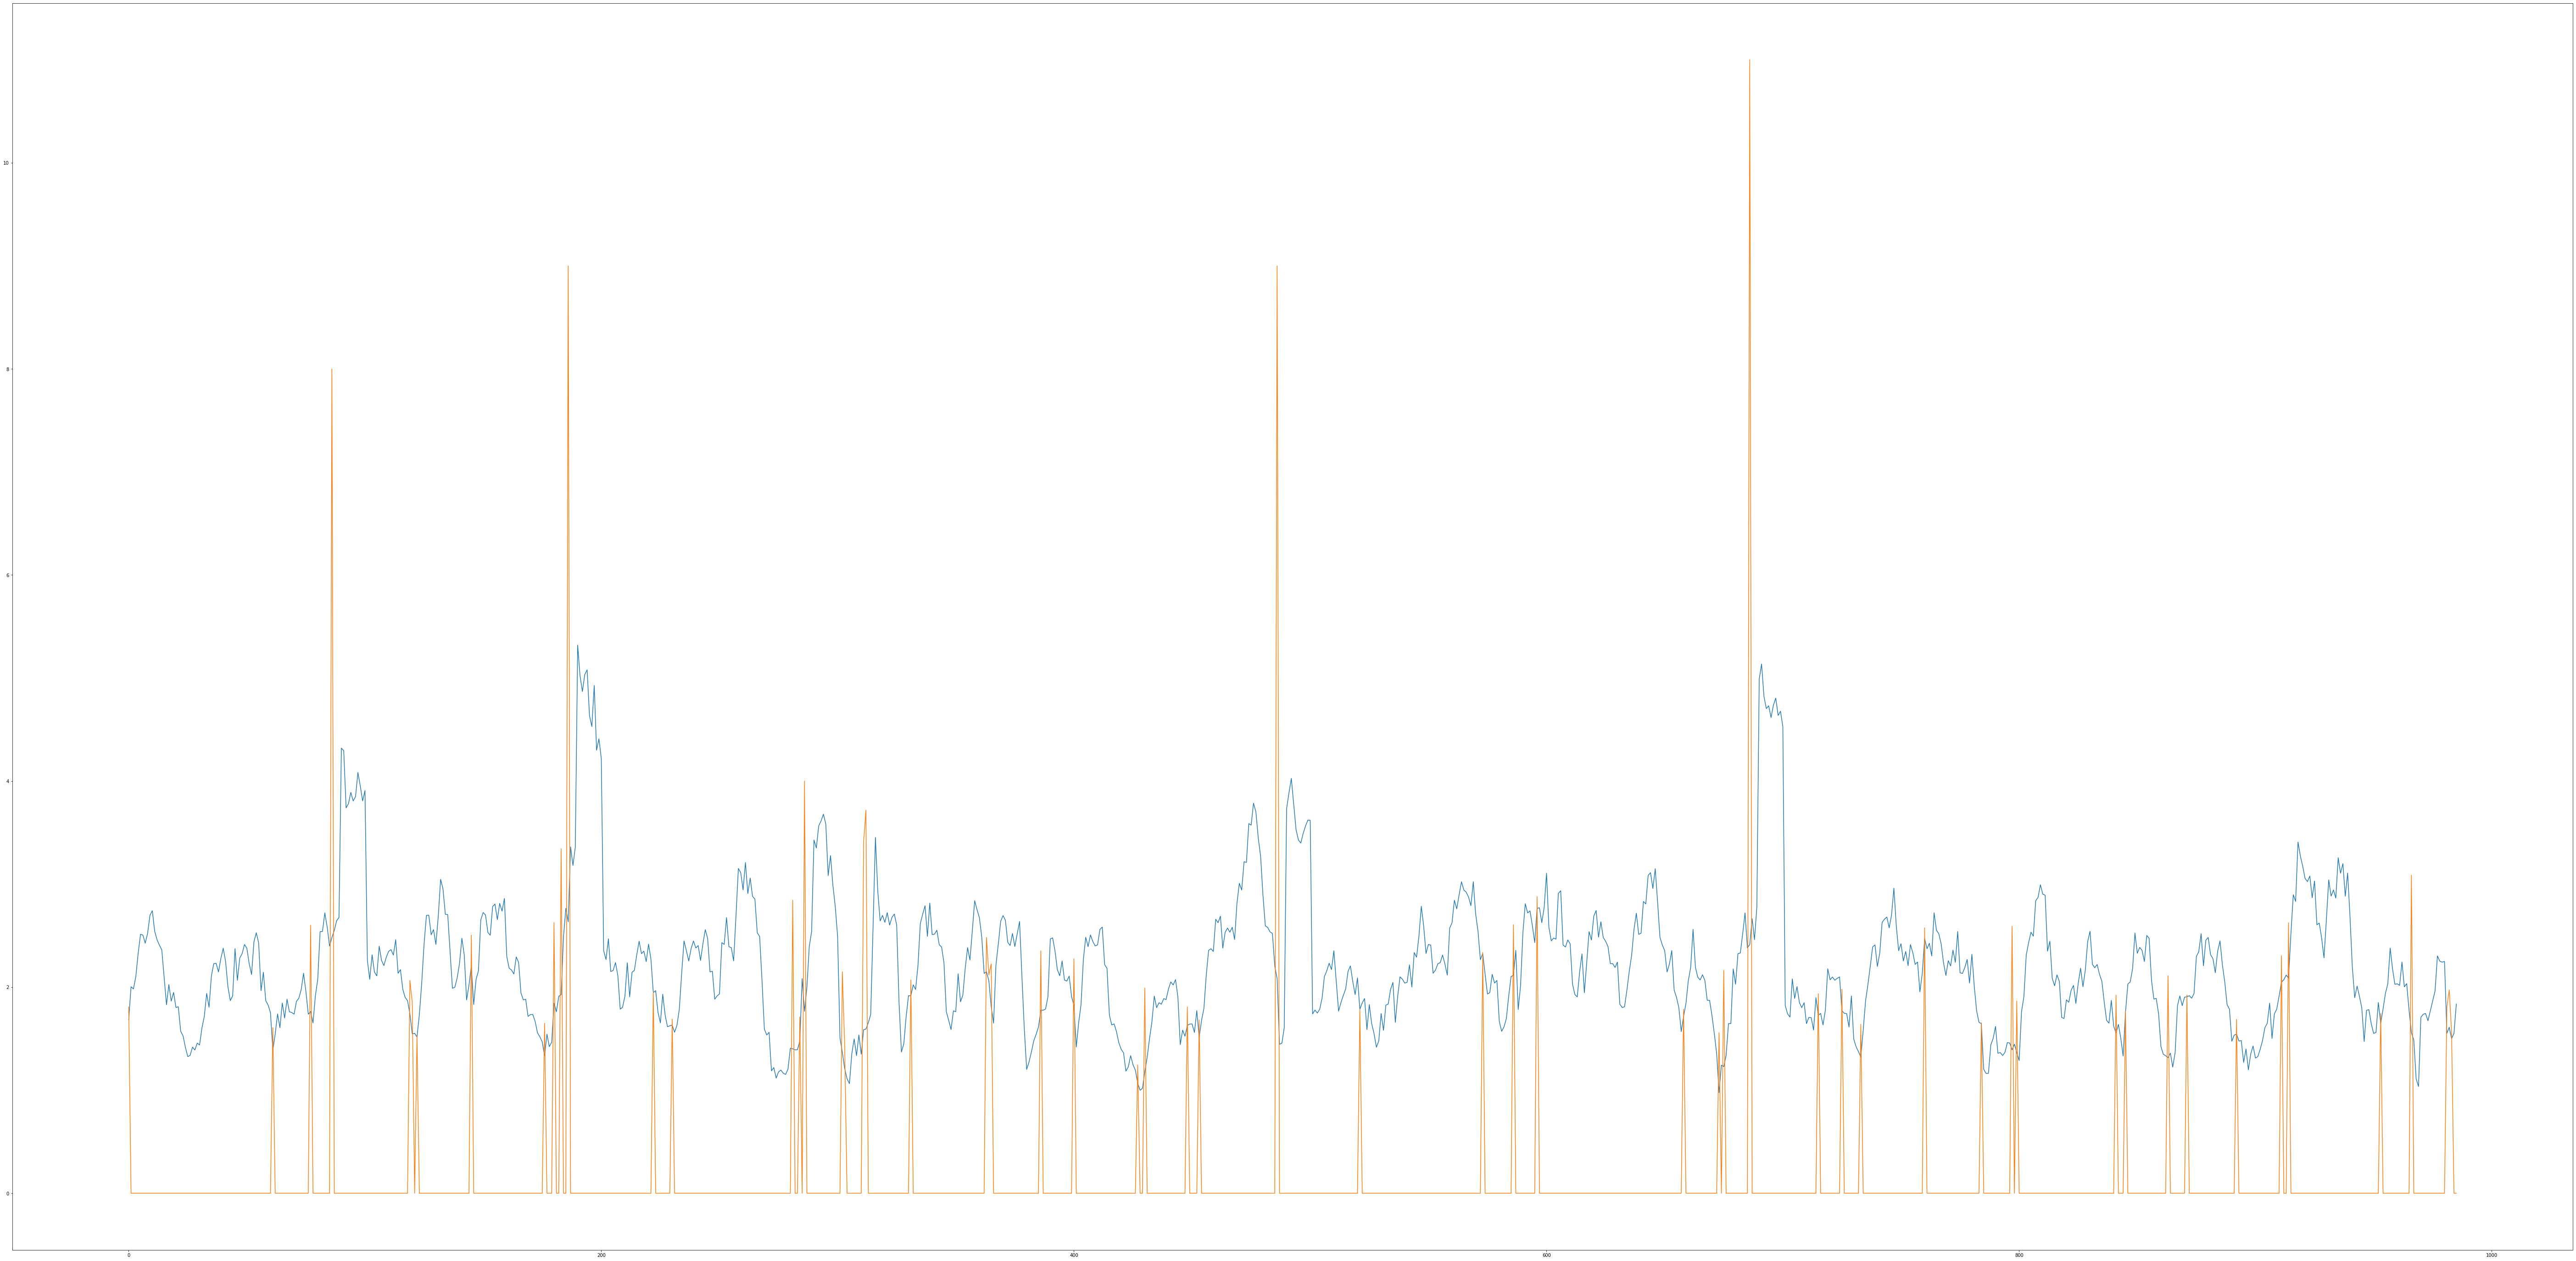

In [10]:
plt.figure(figsize=(100,50))
plt.plot(threshold_cfar)
plt.plot(signal_cfar)
plt.show()

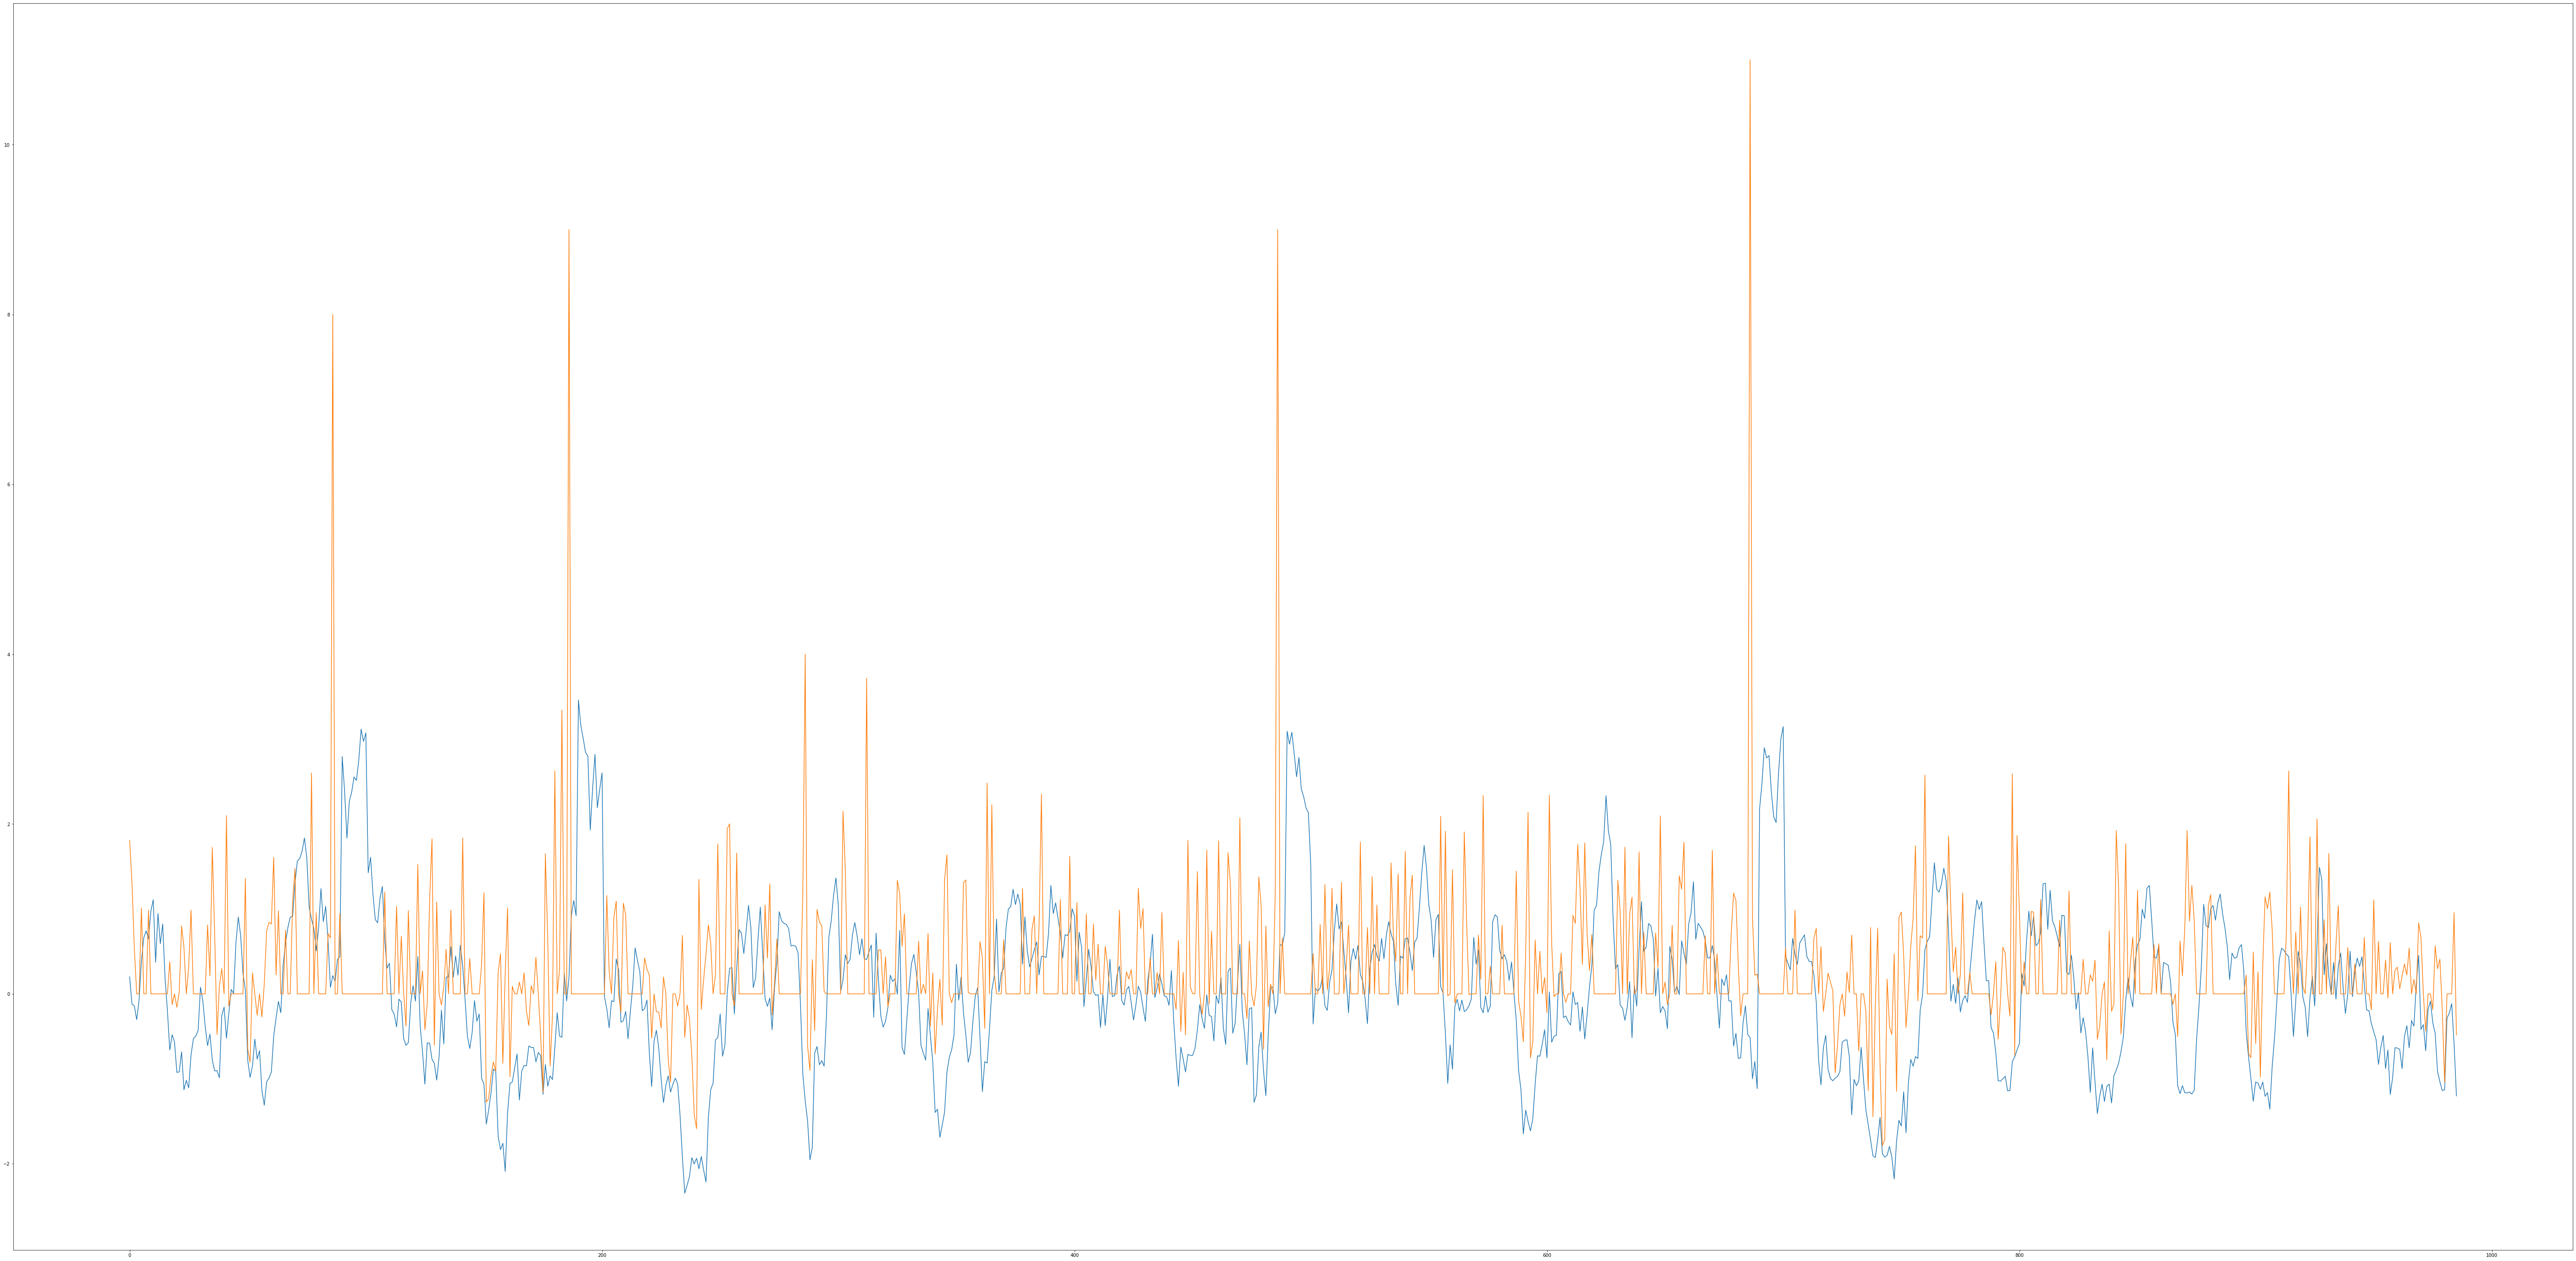

In [11]:
#without abs
threshold_cfar = []
signal_cfar = []

for i in range(0,Ns -(GUARD_CELL_SIZE + TRAINING_CELL_SIZE)):
  n = np.sum(noise[i:i+T-1])
  t = (n/T)*OFF
  threshold_cfar.append(t)
  signal = noise[i+T+G]
  if signal < t:
    signal = 0
  signal_cfar.append(signal)

plt.figure(figsize=(100,50))
plt.plot(threshold_cfar)
plt.plot(signal_cfar)
plt.show()